In [1]:
import pandas as pd
import json
import re

In [2]:
file_path = '/Users/annikalu/Desktop/Capstone_Project/Winter/WTO_0123.jsonl'

def read_jsonl(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            data.append(json.loads(line))
    return data

wto_data = read_jsonl(file_path)

In [3]:
df = pd.DataFrame(wto_data)

In [4]:
def remove_urls(text):
    # 移除文本中的URL
    return re.sub(r'http[s]?://\S+', '', str(text))

# 應用函數移除DataFrame中每行的URL
df['text'] = df['text'].apply(remove_urls)

In [5]:
non_df = df[df['text'] != '']
print(non_df)

              id                                              title  \
0      215456332                                              S.732   
1      216565879                                             S.1306   
2      217207860                                           H.R.3524   
3      217287522                                           H.R.3625   
4      217461374                                           H.R.3764   
...          ...                                                ...   
72558  177535627                                    WMEAT 1969-1978   
72559  203073492  Patent and Trademark Office Complete Text of I...   
72560  203074116                   Appeal and Interference Practice   
72561  216501014                    Public Hearing - March 12, 1988   
72562  235261307  Whether Uruguay Round Agreements Required Rati...   

                       date  \
0      2022-12-05T10:30:00Z   
1      2022-12-19T10:30:00Z   
2      2022-12-30T10:30:00Z   
3      2022-11-01T10:30

In [6]:
from flair.models import TextClassifier
from flair.data import Sentence
classifier = TextClassifier.load('en-sentiment')

In [7]:
# 定义一个函数来应用情感分析
def analyze_sentiment(text):
    sentence = Sentence(text)
    classifier.predict(sentence)
    # 返回情绪标签和分数
    return str(sentence.labels)

# 应用情感分析到每一行的preprocessed_text列
non_df['sentiment'] = non_df['text'].apply(analyze_sentiment)

# 查看结果
print(non_df.head())

# 可选：保存结果到新的CSV文件
#df.to_csv('sentiment_analyzed_dataset.csv', index=False)


          id     title                  date                         source  \
0  215456332     S.732  2022-12-05T10:30:00Z                    U.S. Senate   
1  216565879    S.1306  2022-12-19T10:30:00Z                    U.S. Senate   
2  217207860  H.R.3524  2022-12-30T10:30:00Z  U.S. House of Representatives   
3  217287522  H.R.3625  2022-11-01T10:30:00Z  U.S. House of Representatives   
4  217461374  H.R.3764  2022-12-30T10:30:00Z  U.S. House of Representatives   

  sourceType                                           keywords  \
0     Senate  [federal agencies, executive order, waivers, b...   
1     Senate  [committee, homeland security, personal protec...   
2      House  [foreign affairs, house committee, foreign cou...   
3      House  [bilateral trade relations, assistance act, tr...   
4      House  [house administration, coastal communities, co...   

                                               names  \
0                                                 []   
1         

/var/folders/vw/0t_rt4594hz7crq3972zhb_w0000gn/T/ipykernel_6109/1760510544.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_df['sentiment'] = non_df['text'].apply(analyze_sentiment)


In [10]:
pattern = re.compile(r"→ (\w+) \((\d+\.\d+)\)")

In [13]:
non_df['extracted_sentiment'] = non_df['sentiment'].apply(lambda x: 'POSITIVE' if 'POSITIVE' in x else ('NEGATIVE' if 'NEGATIVE' in x else 'NEUTRAL'))

/var/folders/vw/0t_rt4594hz7crq3972zhb_w0000gn/T/ipykernel_6109/702908341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_df['extracted_sentiment'] = non_df['sentiment'].apply(lambda x: 'POSITIVE' if 'POSITIVE' in x else ('NEGATIVE' if 'NEGATIVE' in x else 'NEUTRAL'))


In [16]:
def extract_confidence(text):
    match = re.search(r'\((\d\.\d+)\)', text)
    return float(match.group(1)) if match else None

In [17]:
non_df['extracted_confidence'] = non_df['sentiment'].apply(extract_confidence)

/var/folders/vw/0t_rt4594hz7crq3972zhb_w0000gn/T/ipykernel_6109/3039489242.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_df['extracted_confidence'] = non_df['sentiment'].apply(extract_confidence)


In [19]:
non_df

,id,title,date,source,sourceType,keywords,names,organizations,places,isCurrent,...,duration,views,transcript,religion,military,shares,comments,sentiment,extracted_sentiment,extracted_confidence
0,215456332,S.732,2022-12-05T10:30:00Z,U.S. Senate,Senate,"[federal agencies, executive order, waivers, b...",[],"[U.S. Dept. of Commerce (DOC), U.S. Government...","[United States, America]",True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Sentence[7558]: ""BuyAmerican.gov Act of 2021...",NEGATIVE,0.8394
1,216565879,S.1306,2022-12-19T10:30:00Z,U.S. Senate,Senate,"[committee, homeland security, personal protec...",[],"[Office of Management and Budget (OMB), U.S. S...","[United States, America, District of Columbia]",True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Sentence[5257]: ""Make PPE in America Act T...",NEGATIVE,0.8027
2,217207860,H.R.3524,2022-12-30T10:30:00Z,U.S. House of Representatives,House,"[foreign affairs, house committee, foreign cou...","[Vladimir Putin, Joseph Biden, Floyd Spence, A...","[U.S. Dept. of Commerce (DOC), U.S. Consumer P...","[Australia, United States, United Kingdom, New...",True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Sentence[7565]: ""Ensuring American Global Le...",NEGATIVE,0.6364
3,217287522,H.R.3625,2022-11-01T10:30:00Z,U.S. House of Representatives,House,"[bilateral trade relations, assistance act, tr...",[],"[U.S. Dept. of Commerce (DOC), U.S. Securities...","[United States, Cuba, Uruguay, America, Lourde...",True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Sentence[2946]: ""United States-Cuba Relation...",POSITIVE,0.6688
4,217461374,H.R.3764,2022-12-30T10:30:00Z,U.S. House of Representatives,House,"[house administration, coastal communities, co...","[Eleanor Holmes, Robert Stafford, Margaret Dav...","[White House, U.S. National Park Service (NPS)...","[California, Florida, Mexico, Texas, New York,...",True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Sentence[7743]: ""Ocean-Based Climate Solutio...",POSITIVE,0.8434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72558,177535627,WMEAT 1969-1978,1980-12-01T10:30:00Z,"Bureau of Arms Control, Verification and Compl...",Departments and Related Agencies,"[world, control, data, arms, expenditures, est...","[Ralph Earle, Robert Summers, Irving Kravis, A...","[Central Intelligence Agency (CIA), Arms Contr...","[United States, United Kingdom, China, France,...",True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Sentence[9202]: ""STATES UNITED World Militar...",NEGATIVE,1.7000
72559,203073492,Patent and Trademark Office Complete Text of I...,1995-04-18T10:30:00Z,U.S. Patent and Trademark Office (USPTO),Departments and Related Agencies,"[patent, interference, count, interferences, i...",[],"[U.S. Postal Service (USPS), U.S. Patent and T...","[United States, Uruguay, America]",True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Sentence[9560]: ""Patent and Trademark Office...",POSITIVE,0.9555
72560,203074116,Appeal and Interference Practice,1995-04-11T10:30:00Z,U.S. Patent and Trademark Office (USPTO),Departments and Related Agencies,"[patent, interference, appeal, patent law, pat...","[Fred McKelvey, Van Geuns]","[U.S. Dept. of Commerce (DOC), U.S. Small Busi...","[United States, Canada, Mexico, Virginia, Urug...",True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Sentence[9620]: ""Department of Commerce ...",NEGATIVE,0.9471
72561,216501014,"Public Hearing - March 12, 1988",1988-03-12T10:30:00Z,U.S. Sentencing Commission,Judicial Agency,"[counterfeit goods, intellectual property crim...","[Janet Reno, Robert Rubin, Robert Hill, Richar...","[Federal Bureau of Investigation (FBI), U.S. D...","[United States, Florida, New Jersey, New York,...",True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Sentence[9136]: ""UNITED STATES SENTENCING CO...",POSITIVE,0.9731


In [27]:
import matplotlib.pyplot as plt

In [31]:
sentiment_counts = non_df['extracted_sentiment'].value_counts()

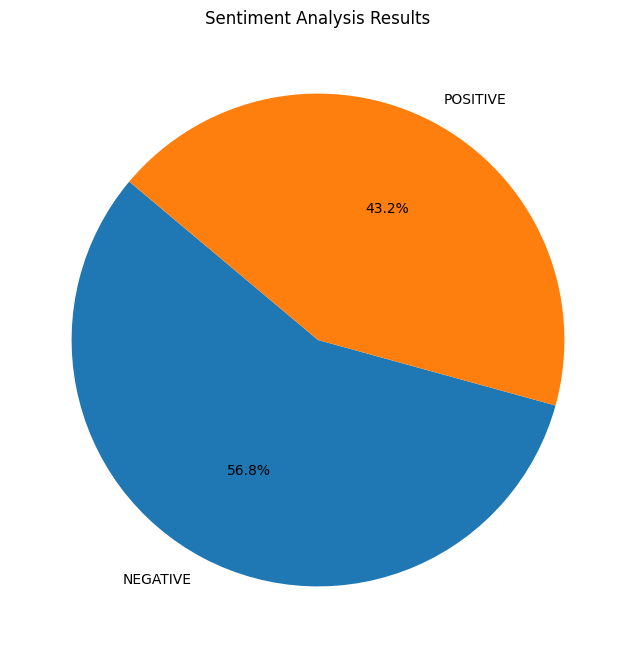

In [32]:
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Analysis Results')
plt.show()

In [21]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.cluster import KMeans
#from flair.embeddings import TransformerDocumentEmbeddings
#from flair.data import Sentence
#import numpy as np

In [22]:
#document_embeddings = TransformerDocumentEmbeddings('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [24]:
#texts = non_df['text']

In [25]:
#def get_flair_embedding(text):
    #sentence = Sentence(text)
    #document_embeddings.embed(sentence)
    # 获取嵌入作为numpy数组
    #embedding = sentence.get_embedding().detach().cpu().numpy()
    #return embedding

In [26]:
#embeddings = np.array([get_flair_embedding(text) for text in texts])

KeyboardInterrupt: 

In [20]:
#columns_to_read = ['id', 'date', 'source', 'sourceType', 'keywords', 'names',
                   #'organizations', 'places', 'contentType', 'url', 'downLoadUrl',
                   #'text', 'sentiment', 'extracted_sentiment', 'extracted_confidence']

#wto_selected_columns = non_df[columns_to_read]

#csv_file_path = f'/Users/annikalu/Desktop/Capstone_Project/Winter/wto_flair.csv'
#wto_selected_columns.to_csv(csv_file_path, index=False, header=True)
# Select the columns for other data points


#for i in range(0, len(wto_selected_columns), 500):
    #end_index = min(i + 500, len(wto_selected_columns))
    #csv_file_path = f'/Users/annikalu/Desktop/Capstone_Project/Winter/wto_vader_{i//500 + 1}.csv'
    #wto_selected_columns.iloc[i:end_index].to_csv(csv_file_path, index=False, header=True)

In [55]:
row_at_302 = df.loc[100]

# 显示这行数据
print("索引为302的行数据：")
print(row_at_302)

索引为302的行数据：
id                                                           231889385
title                Text of Senate Amendment 5593; Congressional R...
date                                              2022-09-22T10:30:00Z
source                                                     U.S. Senate
sourceType                                                      Senate
keywords             ['digital economy', 'digital world', 'digital ...
names                ['Mike Crapo', 'John Cornyn', 'James Inhofe', ...
organizations        ['Bureau of Economic Analysis (BEA)', 'U.S. De...
places                                      ['United States', 'China']
isCurrent                                                         True
wordCount                                                         1748
contentType                               Congressional Record: Senate
url                  https://www.congress.gov/congressional-record/...
text                 Text of Senate Amendment 5593; Congressional